In [153]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_stata("callreports_final.dta", chunksize=100000, preserve_dtypes=True)

df_raw = pd.DataFrame()

for chunk in data:
    df_raw=df_raw.append(chunk)

In [154]:
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.style.use('ggplot')


plt.rcParams['font.size']=BIGGER_SIZE          # controls default text sizes
plt.rcParams['axes.titlesize']=BIGGER_SIZE     # fontsize of the axes title
plt.rcParams['axes.labelsize']=BIGGER_SIZE    # fontsize of the x and y labels
plt.rcParams['xtick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['ytick.labelsize']=BIGGER_SIZE    # fontsize of the tick labels
plt.rcParams['legend.fontsize']=BIGGER_SIZE    # legend fontsize
plt.rcParams['figure.titlesize']=BIGGER_SIZE  # fontsize of the figure title

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

#plt.rcParams['legend.fontsize'] = 22

In [155]:
df_assets = df_raw[["rssdid", "name", 'year', "quarter","assets", "cash","fedfundsrepoasset" ,"securities","loansnet", "tradingassets", "interestratederivatives"]]
df_liab = df_raw[["rssdid", "name", 'year', "quarter","assets", "equity","fedfundsrepoliab" ,"deposits","foreigndep", "otherborrowedmoney", "tradingliabilities", "liabilities"]]
df_asset_median = df_assets.groupby(["year", "quarter"]).median()
df_liab_median = df_liab.groupby(["year", "quarter"]).median()
df_asset_median = df_asset_median.reset_index()
df_liab_median = df_liab_median.reset_index()
df_liab_median

year  quarter    rssdid    assets   equity  fedfundsrepoliab  deposits  foreigndep  otherborrowedmoney  tradingliabilities  liabilities
0    1976.0      1.0  518859.0   15427.0   1256.0               0.0   13999.0         0.0                 0.0                 NaN      14197.0
1    1976.0      2.0  519300.0   15886.5   1295.0               0.0   14327.5         0.0                 0.0                 NaN      14636.5
2    1976.0      3.0  519183.5   16266.0   1346.0               0.0   14676.5         0.0                 0.0                 NaN      14952.0
3    1976.0      4.0  519146.0   16866.0   1348.0               0.0   15269.0         0.0                 0.0                 NaN      15524.0
4    1977.0      1.0  518859.0   17211.0   1398.0               0.0   15547.0         0.0                 0.0                 NaN      15790.0
5    1977.0      2.0  518849.5   17659.0   1433.5               0.0   15846.0         0.0                 0.0                 NaN      16161.5
6    1977.0      3.0  518429.5   18157.5   1488.5               0.0   16296.5         0.0                 0.0                 NaN      16683.5
7    1977.0      4.0  518279.0   19128.0   1492.0               0.0   17300.0         0.0                 0.0                 NaN      17569.0
8    1978.0      1.0  518550.0   19297.0   1551.0               0.0   17410.0         0.0                 0.0                 NaN      17753.0
9    1978.0      2.0  518617.0   20070.0   1602.5               0.0   18026.0         0.0                 0.0                 NaN      18469.0
10   1978.0      3.0  518550.0   20534.0   1664.0               0.0   18419.0         0.0                 0.0                 NaN      18894.0
11   1978.0      4.0  518265.0   21073.5   1672.0               0.0   18956.5         0.0                 0.0                 NaN      19378.5
12   1979.0      1.0  518251.0   21175.5   1738.0               0.0   18903.5         0.0                 0.0                 NaN      19415.0
13   1979.0      2.0  518639.5   21814.5   1798.5               0.0   19394.0         0.0                 0.0                 NaN      19921.5
14   1979.0      3.0  518485.0   22259.0   1870.0               0.0   19783.5         0.0                 0.0                 NaN      20348.0
15   1979.0      4.0  518718.0   22988.0   1880.0               0.0   20528.0         0.0                 0.0                 NaN      21029.0
16   1980.0      1.0  518765.0   23175.0   1967.0               0.0   20609.0         0.0                 0.0                 NaN      21156.0
17   1980.0      2.0  519300.0   23550.0   2023.0               0.0   20912.0         0.0                 0.0                 NaN      21483.5
18   1980.0      3.0  519436.0   24102.0   2076.0               0.0   21442.0         0.0                 0.0                 NaN      21970.0
19   1980.0      4.0  518952.0   24995.5   2109.5               0.0   22208.5         0.0                 0.0                 NaN      22840.0
20   1981.0      1.0  518671.0   25451.0   2198.0               0.0   22539.0         0.0                 0.0                 NaN      23307.0
21   1981.0      2.0  518485.0   25927.0   2261.5               0.0   22908.0         0.0                 0.0                 NaN      23692.5
22   1981.0      3.0  518251.0   26225.5   2339.0               0.0   23101.0         0.0                 0.0                 NaN      23948.5
23   1981.0      4.0  518265.0   27495.0   2336.0               0.0   24259.0         0.0                 0.0                 NaN      25218.0
24   1982.0      1.0  518387.0   27889.0   2408.0               0.0   24497.0         0.0                 0.0                 NaN      25507.0
25   1982.0      2.0  519244.0   28511.0   2490.0               0.0   24858.0         0.0                 0.0                 NaN      25998.0
26   1982.0      3.0  518608.0   28918.0   2545.0               0.0   25266.0         0.0                 0.0                 NaN      26343.0
27 

In [156]:
df_assets_4 = df_assets[df_assets.quarter==4]
df_assets_4.set_index("rssdid", inplace=True)
df_test = df_assets_4[df_assets_4.year==year]
df_assets_4

name    year  quarter    assets      cash  fedfundsrepoasset  securities  loansnet  tradingassets  interestratederivatives
rssdid                                                                                                                                               
28.0          FIRST ATLANTIC BK  1986.0      4.0    5742.0     292.0             1045.0       611.0    3406.0            0.0                      NaN
28.0          FIRST ATLANTIC BK  1987.0      4.0   11844.0     506.0             1730.0      1289.0    7286.0            0.0                      NaN
28.0          FIRST ATLANTIC BK  1988.0      4.0   18221.0     754.0             2270.0      1687.0   12231.0            0.0                      NaN
28.0          FIRST ATLANTIC BK  1989.0      4.0   23312.0     800.0             3366.0      1497.0   16029.0            0.0                      NaN
28.0          FIRST ATLANTIC BK  1990.0      4.0   27251.0    1014.0             2937.0      2309.0   19102.0            0.0                      NaN
...                         ...     ...      ...       ...       ...                ...         ...       ...            ...                      ...
4262543.0    ALOSTAR BK OF CMRC  2012.0      4.0  777842.0  143773.0             7302.0    308443.0  240262.0            0.0                      0.0
4262543.0    ALOSTAR BK OF CMRC  2013.0      4.0  808999.0   41030.0             2368.0    247238.0  472900.0            0.0                      0.0
4536084.0  BANK OF BIRD-IN-HAND  2013.0      4.0   35356.0    1250.0            23972.0      4000.0    5577.0            0.0                      0.0
4569167.0     NEW TRADITIONS BK  2013.0      4.0  507242.0  166758.0                0.0      5000.0  319259.0            0.0                      0.0
4589857.0        INVESCO NAT TC  2013.0      4.0  270022.0  203970.0                0.0         0.0       0.0            0.0                      0.0

[399092 rows x 10 columns]

[8.82267240e-06 1.16167923e-07 1.34128856e-09 1.23336879e-11]


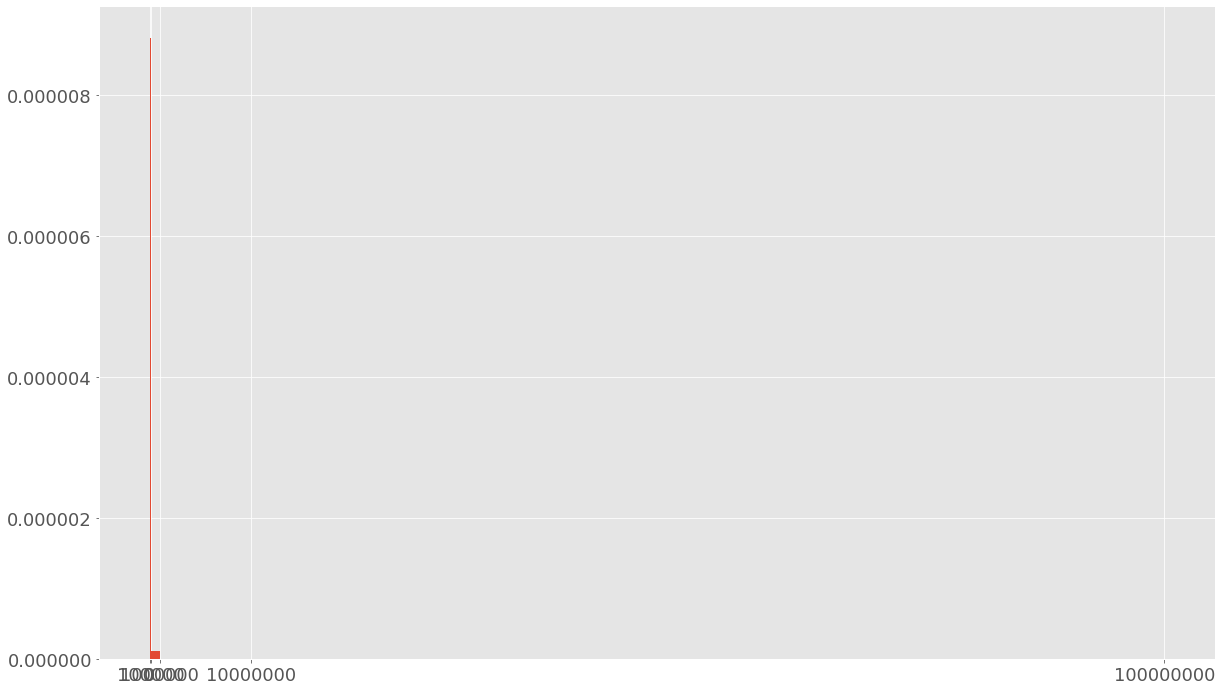

In [244]:
fig, ax = plt.subplots(figsize=(20,12))
df_1980 = df_assets_4[df_assets_4.year==1980]
#df_1980 = df_1980[df_1980.assets<100000]
#print(df_1980)
bins = [0, 100000, 1000000, 10000000, 100000000]
ax.ticklabel_format(useOffset=False, style='plain')
n, bins, patches = ax.hist(df_1980.assets,bins=bins, density=True)
ax.set_xticks(bins)
#print(df_1980[df_1980.assets>1000000])
print(n)



In [284]:


freq_df = pd.DataFrame()

year = 1980


for i in range(7):
    temp_df = df_assets_4[df_assets_4.year==year]
    
    temp_freq = temp_df.assets.apply(pd.Series.value_counts, bins=[0, 100000, 1000000, 10000000, 10000000000])
    
    s = temp_freq.apply(np.sum, axis=0)
    print(s)
    freq_df = freq_df.append(s, ignore_index=True)
    
    year = year + 5

    

#freq_df['sortkey']=s_df.index.map(lambda x : x.left)
#freq_df=freq_df.sort_values('sortkey')
#freq_df.drop(["sortkey"], axis=1, inplace=True)

freq_df
    

(-0.001, 100000.0]             12717.0
(10000000.0, 10000000000.0]       18.0
(1000000.0, 10000000.0]          174.0
(100000.0, 1000000.0]           1507.0
dtype: float64
(-0.001, 100000.0]             11674.0
(10000000.0, 10000000000.0]       27.0
(1000000.0, 10000000.0]          287.0
(100000.0, 1000000.0]           2287.0
dtype: float64
(-0.001, 100000.0]             9145
(10000000.0, 10000000000.0]      49
(1000000.0, 10000000.0]         325
(100000.0, 1000000.0]          2693
dtype: int64
(-0.001, 100000.0]             6613
(10000000.0, 10000000000.0]      75
(1000000.0, 10000000.0]         342
(100000.0, 1000000.0]          2843
dtype: int64
(-0.001, 100000.0]             4810
(10000000.0, 10000000000.0]      80
(1000000.0, 10000000.0]         307
(100000.0, 1000000.0]          3055
dtype: int64
(-0.001, 100000.0]             3435
(10000000.0, 10000000000.0]      80
(1000000.0, 10000000.0]         381
(100000.0, 1000000.0]          3562
dtype: int64
(-0.001, 100000.0]            

(-0.001, 100000.0]  (100000.0, 1000000.0]  (1000000.0, 10000000.0]  (10000000.0, 10000000000.0]
0             12717.0                 1507.0                    174.0                         18.0
1             11674.0                 2287.0                    287.0                         27.0
2              9145.0                 2693.0                    325.0                         49.0
3              6613.0                 2843.0                    342.0                         75.0
4              4810.0                 3055.0                    307.0                         80.0
5              3435.0                 3562.0                    381.0                         80.0
6              2313.0                 3670.0                    413.0                         83.0

In [288]:
freq_df_T = freq_df.T
freq_df_T.rename(columns={0 : "1980", 1 : "1985", 2: "1990", 3: "1995", 4: "2000", 5: "2005", 6: "2010"}, inplace=True)
freq_df_T



1980     1985    1990    1995    2000    2005    2010
(-0.001, 100000.0]           12717.0  11674.0  9145.0  6613.0  4810.0  3435.0  2313.0
(100000.0, 1000000.0]         1507.0   2287.0  2693.0  2843.0  3055.0  3562.0  3670.0
(1000000.0, 10000000.0]        174.0    287.0   325.0   342.0   307.0   381.0   413.0
(10000000.0, 10000000000.0]     18.0     27.0    49.0    75.0    80.0    80.0    83.0

ValueError: Buffer has wrong number of dimensions (expected 1, got 0)

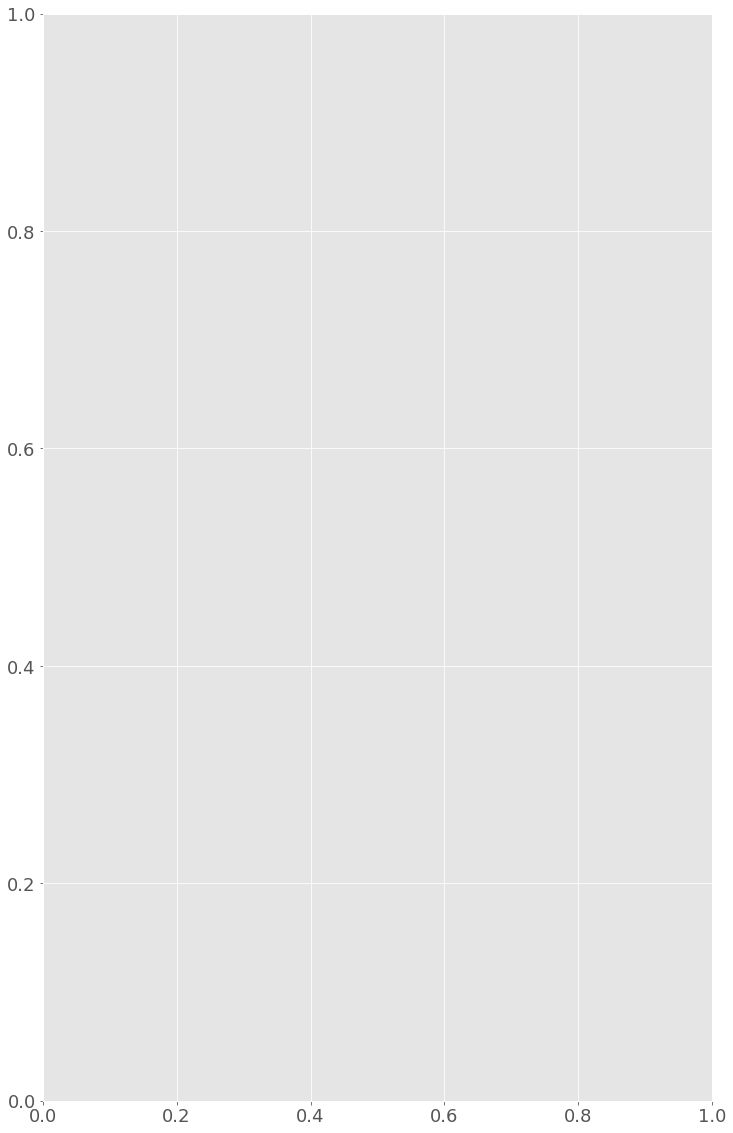

In [298]:
fig, ax = plt.subplots(figsize=(12,20))
freq_df_T_T = freq_df_T.T
series = freq_df_T_T.iloc[:,0]
type(series)
series.plot()
#freq_df_T_T.iloc[:,0].plot()

In [278]:
frequency_df = df_1980.assets.apply(pd.Series.value_counts, bins=[0, 100000, 1000000, 10000000, 1000000000])
frequency_df


KeyboardInterrupt: 

In [252]:
s = frequency_df.apply(np.sum, axis=0)
s_df = pd.DataFrame(s, columns=["assets"])
s_df['sortkey']=s_df.index.map(lambda x : x.left)
s_df=s_df.sort_values('sortkey')
s_df.drop(["sortkey"], axis=1, inplace=True)

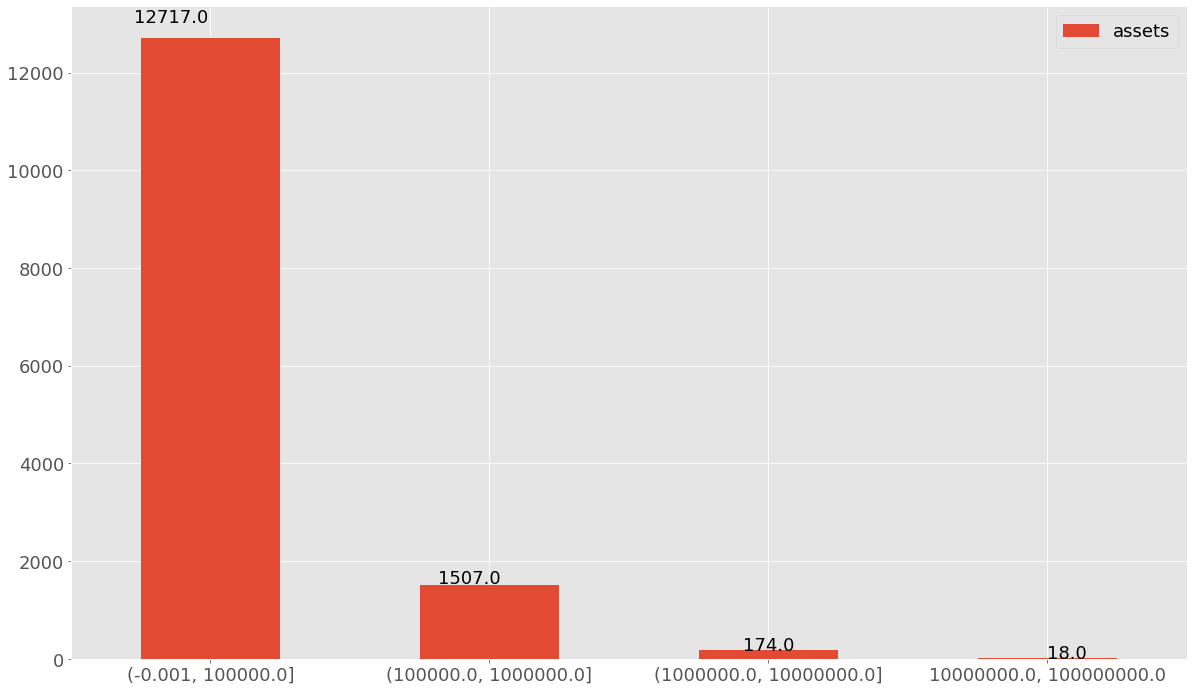

In [255]:


s_df.index = s_df.index.astype(str)

fig, ax = plt.subplots(figsize=(20,12))

s_df.plot.bar(ax=ax)
ax.set_xticklabels(clean_frequency_df.index, rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.09, p.get_height() * 1.025))

           (-0.001, 100000.0]  (10000000.0, 100000000.0]  (1000000.0, 10000000.0]  (100000.0, 1000000.0]
rssdid                                                                                                  
37.0                      1.0                        0.0                      0.0                    0.0
55.0                      1.0                        0.0                      0.0                    0.0
64.0                      1.0                        0.0                      0.0                    0.0
130.0                     1.0                        0.0                      0.0                    0.0
233.0                     0.0                        0.0                      0.0                    1.0
...                       ...                        ...                      ...                    ...
1429064.0                 1.0                        0.0                      0.0                    0.0
1429224.0                 1.0                        0.

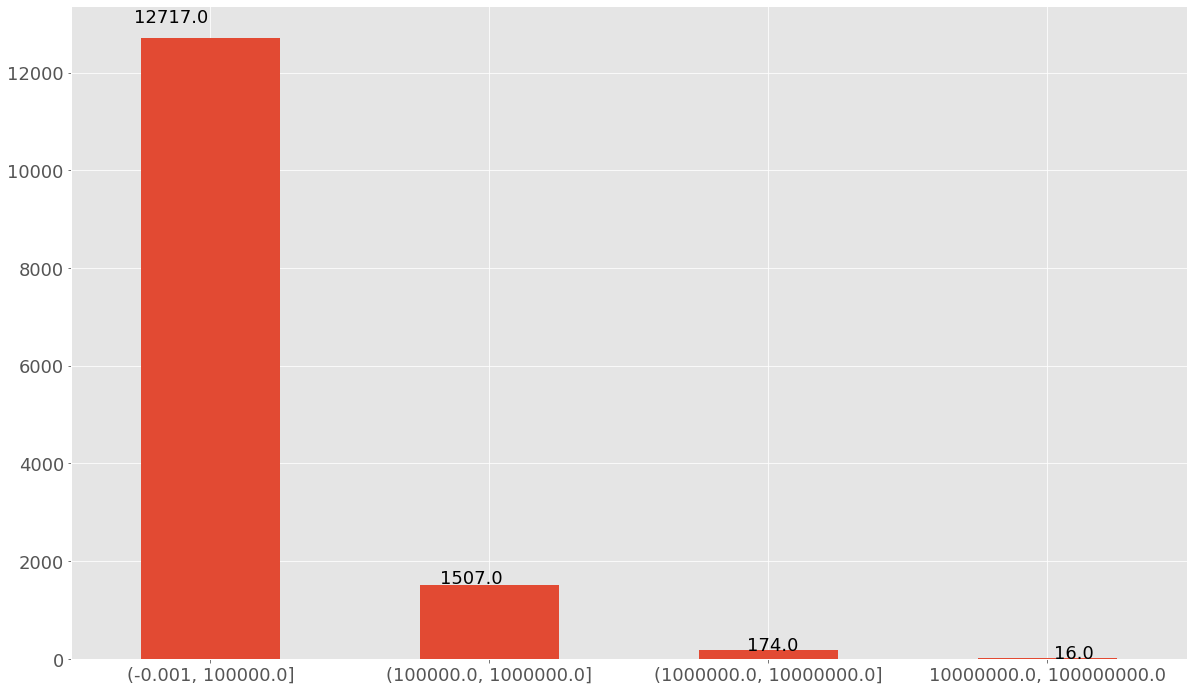

In [214]:
print(frequency_df)
sum1 = frequency_df.iloc[:,0].sum()
sum2 = frequency_df.iloc[:,1].sum()
sum3 = frequency_df.iloc[:,2].sum()
sum4 = frequency_df.iloc[:,3].sum()
dic = { "(-0.001, 100000.0]" : sum1, "(100000.0, 1000000.0]" : sum4, "(1000000.0, 10000000.0]" : sum3, "10000000.0, 100000000.0": sum2 }
clean_frequency_df = pd.Series(dic)
clean_frequency_df

fig, ax = plt.subplots(figsize=(20,12))

clean_frequency_df.plot.bar(ax=ax)
ax.set_xticklabels(clean_frequency_df.index, rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.10, p.get_height() * 1.025))
#df_big_banks_median = df_big_banks.groupby(["year", "quarter"]).median()
#frequency_df.groupby(frequency_df.index ,axis="columns").sum


name                       19
year                       19
quarter                    19
assets                     19
cash                       19
fedfundsrepoasset          19
securities                 19
loansnet                   19
tradingassets              19
interestratederivatives     1
dtype: int64


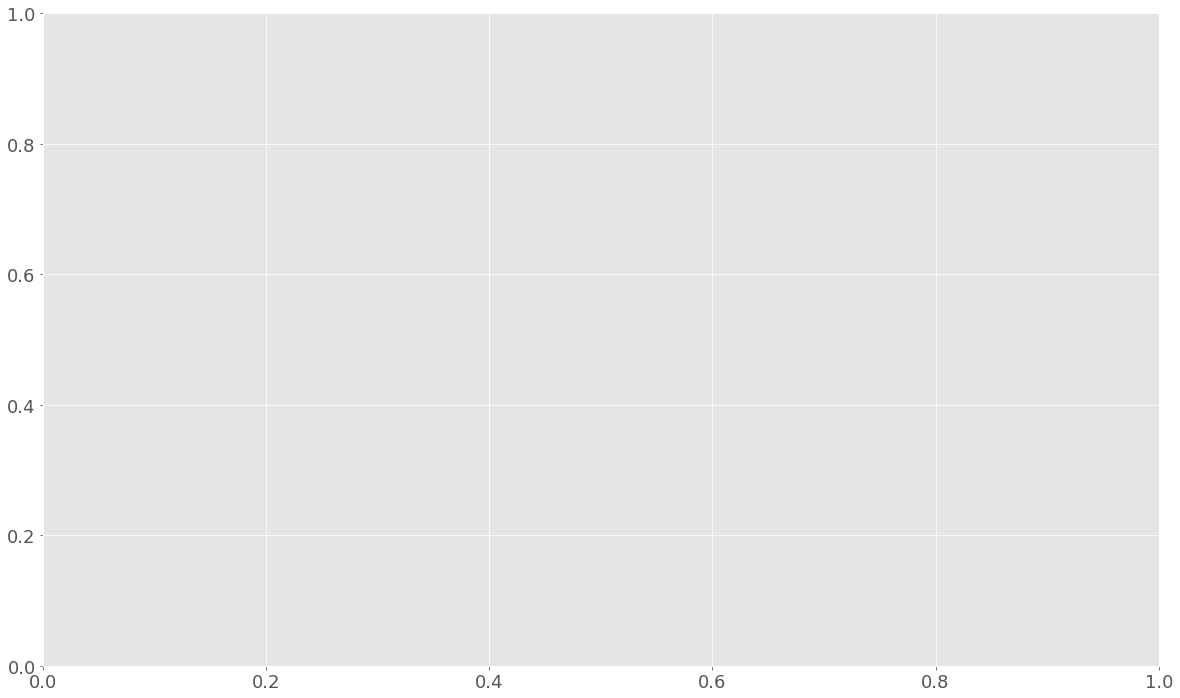

In [141]:
fig, ax = plt.subplots(figsize=(20,12))
df_2000 = df_assets_4[df_assets_4.year==2010]
#df_2000 = df_2000[df_2000.assets<100000]
#print(df_1980)
ax.ticklabel_format(useOffset=False, style='plain')
n, bins, patches = ax.hist(df_2000.assets,bins=70,range=(0, 1000000))

df_2000.assets.describe()

print(df_2000[df_2000.assets>100000000].count())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


ValueError: cannot reindex from a duplicate axis

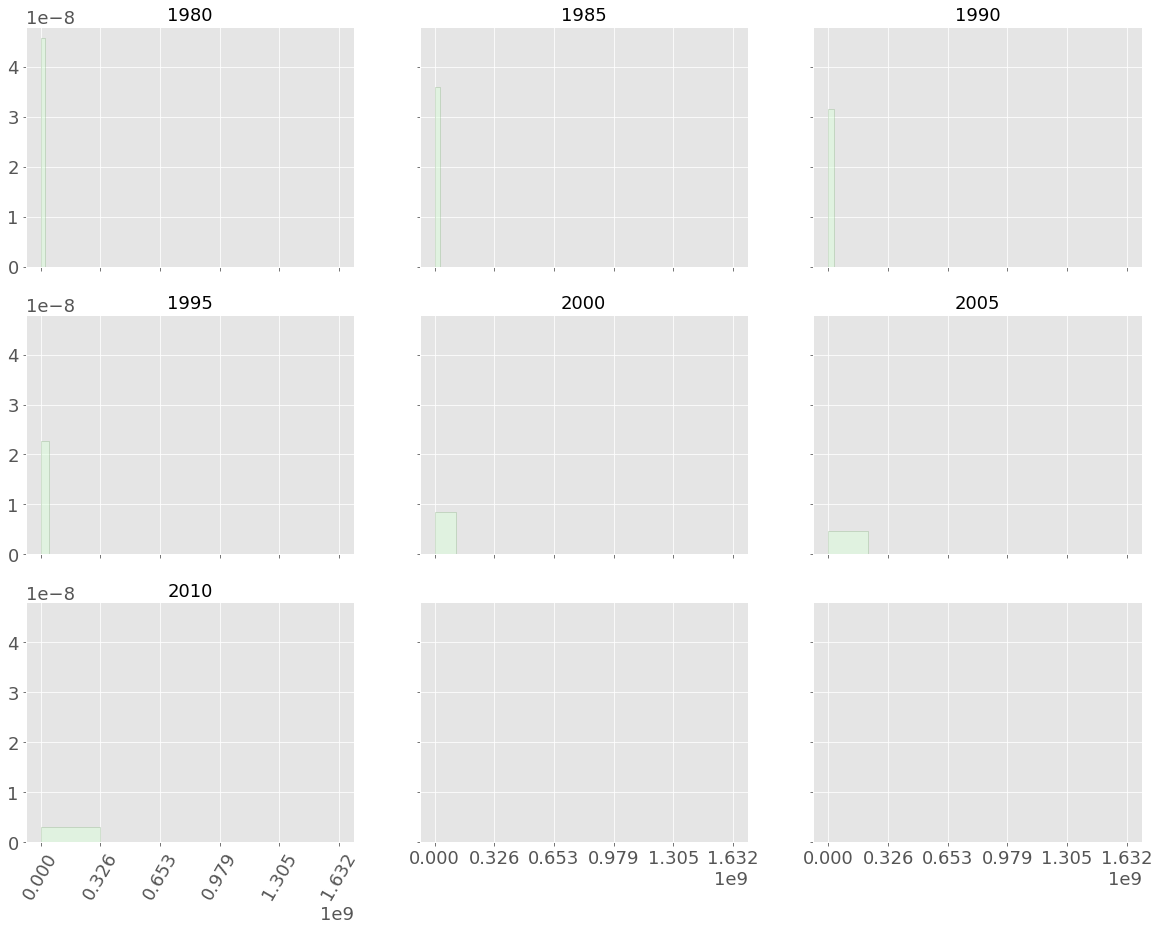

In [89]:
#df = df_all.reset_index(level="year")
#print(df[df.leverageRatio>20])
#df = df[(df.leverageRatio > 0)]
#print(df)
fig, ax = plt.subplots(3, 3, figsize=(20,15), sharey=True, sharex=True)
ax = ax.ravel() 
year=1980
x = 0
temp_df = pd.DataFrame()
for x in range(7):
    temp_df = df_assets_4[df_assets_4.year==year]
    #print(temp_df.assets)
    n, bins, patches = ax[x].hist(temp_df.assets, bins=5 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
    ax[x].set_title(year)
    ax[x].set(xticks=bins)
    #ax[x].text(14.5,0.12,temp_df.assets.describe().round(2).to_string())
    #ax[x].text(16.5,0.175, "Mean: " + str(round(temp_df.leverageRatio.mean(),2)))
    #ax[x].text(17,0.165, "Median: " + str(temp_df.leverageRatio.median()))
    for tick in ax[x].get_xticklabels():
        tick.set_rotation(60)
    #print(bins)
    #ax[x].set_xticklabels(bins, rotation=60)
    year = year + 5

year = year - 2
temp_df = df_assets[df_assets_4.year==year]
n, bins, patches = ax[7].hist(temp_df.assets, bins=50 ,density=True, alpha=0.5, edgecolor="#6A9662",color="#DDFFDD")
for tick in ax[7].get_xticklabels():
        tick.set_rotation(60)
ax[7].set_title(year)
#ax[1].text(1,1, temp_df.leverageRatio.mean())
ax[7].set(xticks=bins)
#ax[7].text(14,0.12,temp_df.assets.describe().round(2).to_string())
fig.delaxes(ax[8])
#fig.suptitle('Categorical Plotting')
#plt.subplots_adjust(left=0.1, bottom=0.02, right=0.75)
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/Leverage/LeverageDistribution_LeverageRatio_8013.png')
#y = temp_df.leverageRatio.describe()
#print(type(y))

Median banks asset side by category (small, middle, big)

In [285]:
#big bank
df_big_banks = df_assets[df_assets.assets >= 10000000]
df_big_banks_median = df_big_banks.groupby(["year", "quarter"]).median()
#middle bank
df_middle_banks = df_assets[(df_assets.assets < 10000000) & (df_assets.assets >= 1000000)]
df_middle_banks_median = df_middle_banks.groupby(["year", "quarter"]).median()
#small bank
df_small_banks = df_assets[df_assets.assets < 1000000]
df_small_banks_median = df_small_banks.groupby(["year", "quarter"]).median()



In [12]:
df_middle_banks_median

rssdid    assets     cash  fedfundsrepoasset  securities  loansnet  tradingassets  interestratederivatives
year   quarter                                                                                                              
1976.0 1.0      508243.0  199122.0  22820.0             6400.0     58855.0  100765.0            NaN                      NaN
       2.0      509213.0  201070.0  22712.0             4929.0     58666.0  100874.0            NaN                      NaN
       3.0      508430.5  201067.0  21483.0             5549.0     58968.0  101970.5            NaN                      NaN
       4.0      514963.0  198378.0  21963.0             7000.0     57353.0  100053.0            NaN                      NaN
1977.0 1.0      515484.5  197870.5  20478.0             5750.0     58586.5  102256.5            NaN                      NaN
       2.0      515289.5  198212.5  21094.0             4287.5     57503.5  104738.5            NaN                      NaN
       3.0      509811.0  199082.0  20971.0             4900.0     56583.0  106160.0            NaN                      NaN
       4.0      519315.0  198616.5  23083.5             6000.0     53661.0  103075.5            NaN                      NaN
1978.0 1.0      519409.0  197824.0  20056.0             4943.0     54761.0  105874.0            NaN                      NaN
       2.0      519315.0  197921.5  20856.5             3500.0     54182.0  107198.0            NaN                      NaN
       3.0      519221.0  193165.0  19734.0             4500.0     52142.0  106730.0            NaN                      NaN
       4.0      520049.0  191723.0  21437.0             5200.0     51059.0  105224.0            NaN                      NaN
1979.0 1.0      519422.5  192310.0  19155.0             4150.0     52044.5  106364.5            NaN                      NaN
       2.0      524065.0  190307.0  18835.0             5250.0     49649.0  106629.0            NaN                      NaN
       3.0      519017.0  192029.0  19022.0             7000.0     49354.5  104362.5            NaN                      NaN
       4.0      525820.0  185705.0  20154.0             7000.0     49139.0  101431.0            NaN                      NaN
1980.0 1.0      516006.0  188887.0  20488.0             6700.0     49638.0  102341.0            NaN                      NaN
       2.0      517955.0  184880.0  20012.0             7900.0     49791.0   99495.0            NaN                      NaN
       3.0      511435.0  187179.0  18910.5             8098.5     51026.0   98067.5            NaN                      NaN
       4.0      519436.0  185789.0  19959.0             7965.0     50574.0   97270.0            NaN                      NaN
1981.0 1.0      517302.0  183613.0  19170.0             8700.0     50789.0   96489.0            NaN                      NaN
       2.0      517060.5  183384.0  20556.0             7125.0     49955.5   96176.5            NaN                      NaN
       3.0      519086.5  183930.0  19173.0             6250.0     50115.5   97619.5            NaN                      NaN
       4.0      519384.5  182062.0  21258.0             8100.0     48943.0   95485.0            NaN                      NaN
1982.0 1.0      517302.0  182454.0  19220.0             8800.0     49739.0   97466.0            NaN                      NaN
       2.0      519333.0  182589.0  19989.0             7500.0     49233.0   96523.0            NaN                      NaN
       3.0      519221.0  180953.0  20548.0             7320.0     47557.0   97312.0            NaN                      NaN
       4.0      518420.5  182121.5  20239.5             9780.0     48140.5   93405.0            NaN                      NaN
1983.0 1.0      519277.0  182621.5  19371.5             9055.0     51087.0   93274.0            NaN                      NaN
       2.0      517302.0  182384.0  19052.0             7500.0     51678.0   93926.0            NaN                      NaN
       3.0      51

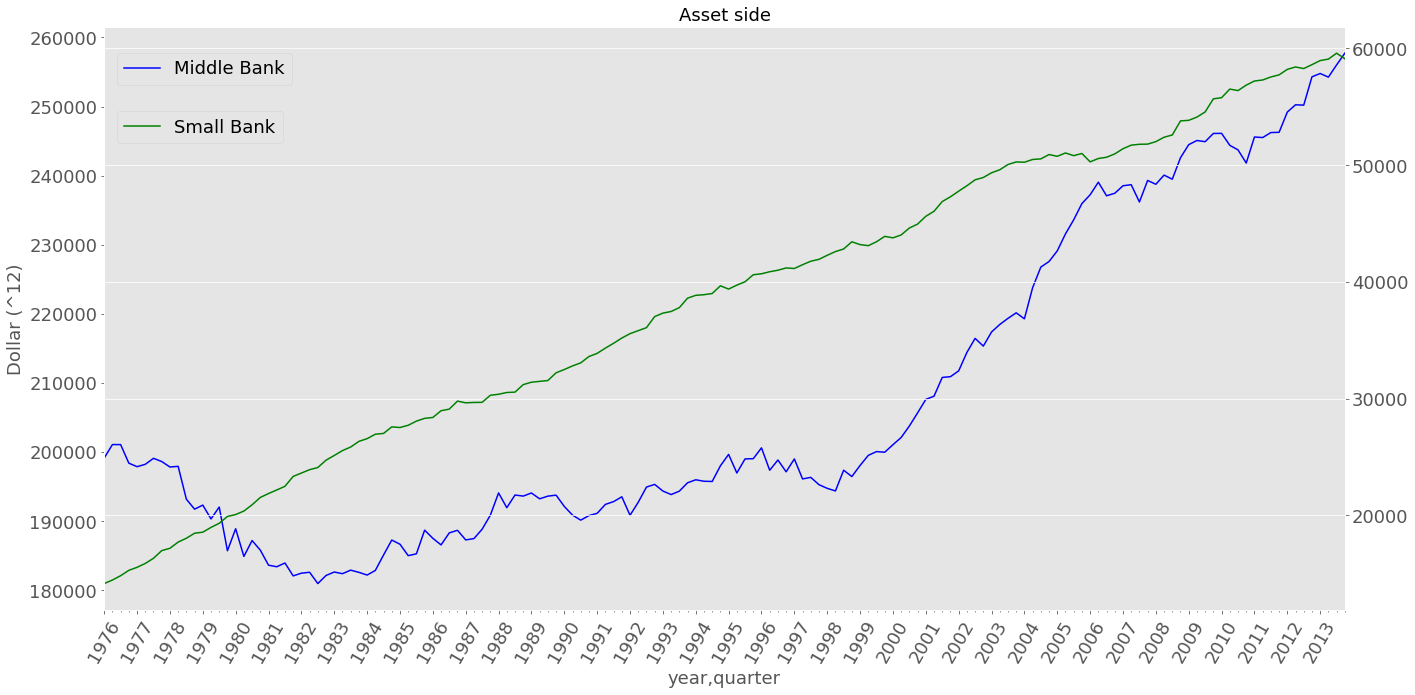

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
years = [str(year) for year in range(1976, 2014)]
ax.set_xticks(range(0,152,4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_title("Asset side")
ax.set_ylabel("Dollar (^12)")
#df_big_banks_median.assets.plot(ax=ax)
df_middle_banks_median.assets.plot(ax=ax, style="b-")
df_small_banks_median.assets.plot(ax=ax2, style="g-")
#plt.plot([df_aggOnePercent.assets, df_aggFivePercent.assets, df_aggTenPercent.assets, df_aggFiftyPercent.assets, df_agg.assets])
ax.set_xticklabels(years, rotation=60)
ax.legend(["Middle Bank"],loc=(0.01, 0.9))
ax2.legend(["Small Bank"], loc=(0.01, 0.8))
ax.grid()
plt.tight_layout()
plt.savefig('LatexVorlage/graphs/DescriptiveStats/OtherAnalysis_BanksAssetsperCat_7613.png')

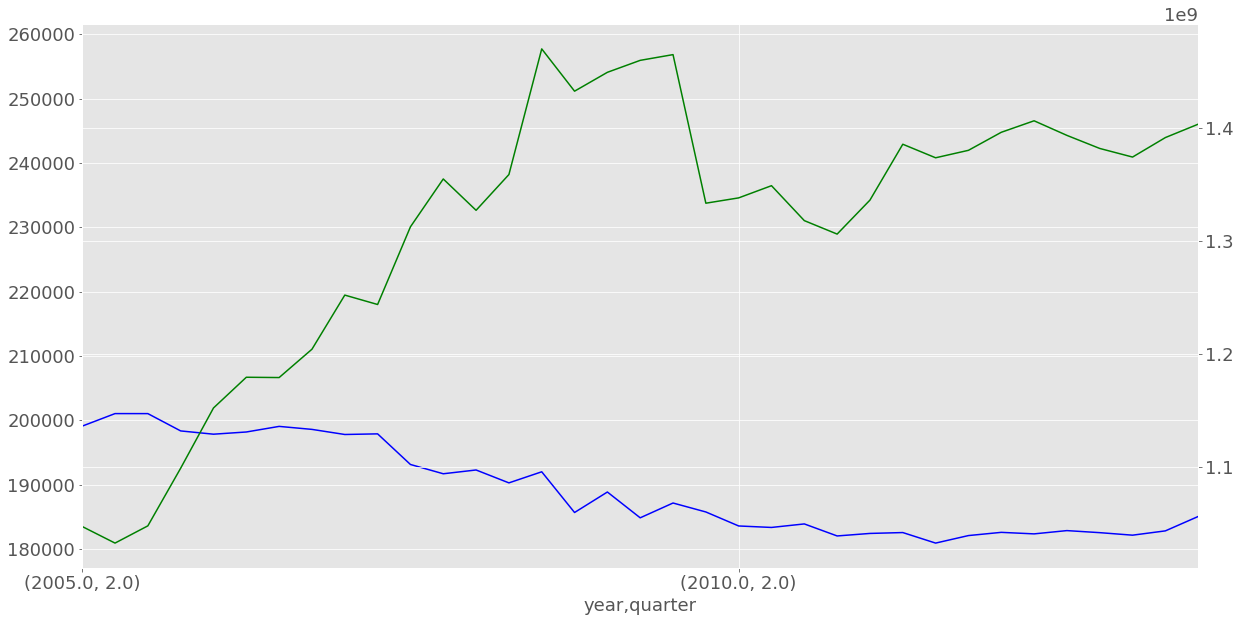

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
df_middle_banks_median.assets.plot(ax=ax, style="b-")
df_big_banks_median.assets.plot(ax=ax2, style="g-")

Middle Bank

Small Bank